## Employee Performance Analysis for INX Future Inc.




**Project summary**



INX Future Inc. known as INX, is a leading data analytics and automation solutions provider. Recently the top management has had growing concerns over the unhealthy employee performance indexes. A data science project by Mr Brian, the CEO, was initiated to look into this. It will analyse the current employee data and find the underlying causes of the performance issues.

The expected insights include:

1.Department wise performances.

2.Top 3 important factors affecting employee performance.

3.A trained model which can predict the employee performance based on factors as inputs.

4.Recommendations to improve the employee performance based on insights from the analysis.

*Requirement*

Third party data sources. The dataset was provided by IABAC via a link: http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls


*Analysis*

The data is structured and is supervised. The variables have both numerical and categorical data. 19 are numerical and 9 are categorical.The target variable is performance rating.

Processing techniques incorporated are checking for missing values, checking for duplicates and unique values, handling of outliers, encoding categorical variables to transform them into numbers and scaling the data.

Analysis by tables and visualization. First statistical analysis was done to understand the data distribution. Then visualization of numerical data via histograms, then visualization of categorical data via histograms too.


For feature selection, two methods are applied. Correlation analysis and use of random forest. This is because we want to get the important factors, then analyze their relation to performance rating. Under correlation, it shows a linear relationship and the features with a correlation of more than one selected. With random forest, there's use of feature importance.

 Based on the data and expected insights, this is a classification problem. The models evaluated are decision tree, random forest and KNeighbors. Definition of dependent and independent variables was done. We find that the target variable has imbalance so to balance it out SMOTE was used. There were variables with infinite values so this was handled by replacing them with mean.




*Summary*

The project was done with the purpose of finding out factors which affected the Performance of the employees, department wise performance, training a model which accurately predicts the Performance Rating of the employee and analyzing the data to provide recommendations to improve the performance and gain insights from the analysis.

Insights gained from the data are


Ages range between 18 to 60, 36 being the median.
Education level has a mean of 2.89, indicating averagely the employees have gotten to college level of education.
Environment and job satisfaction of employees ranges between 1 to 4. They average at about 2.7 which is medium. The hourly rate is between 30 to 100. It averages at 65.98
Number of companies worked is between 1 to 9. A mean of 2.67 shows a good number of employees have not worked in more than 3 companies.
Last salary hike percent is between 11% to 25%. The average percentage being 15.22%.Work experience is between 0 to 40 years. The average is at 11 years which shows the company has moderately experienced staff.
Work life balance is between 1 to 4; 1 being bad 4 being best. It averages at 2.74 which shows a moderate work life balance among the employees. Years at the company is between 0 to 40. Averagely employees have been with the company for about 7 years years as the mean is at 6.23 years.
Years at current role ranges between 0 to 18 years. Employees averagely spend 4.29 years in one role.
Years since last promotion ranges between 0 to 15 years. Averagely promotions are given every 2.19 years.
Performance rating is between 1 to 4. The lowest rating given out is a 2 (good) and averagely the performance is at 2.95.
There are more males than females in the organnization.
Most employees have a life sciences education background, followed by medicine.
Married employees are more than singles and divorced.
Sales has the highest number of employees while data science has the least.
There are more employees who do overtime compared to those who do not. These together with the younger employees are more likely to leave the company.

*Department wise performance insights* :

Individual employee performance and top 3 features in departments were visualized by the use of tableau.Screenshots attached. Development team has the highest mean performance of 3.09. Data science has the lowest count (1 person) of the lowest performance (a rating of 2); also the lowest count (2 people) of the highest performance (rating of 4).Development has the highest count (44 people) of the highest performance rating which is a 4.
Sales has the highest count (87 people) of the lowest performance rating (a 2).Development and Research and development have the highest number of people with high environment satisfaction ratings.Data science has the least.Sales has the highest least percentage of salary hike at 16%. Development, finance, research and development and sales have the highest salary hike percentage of 25%. Development, Research and development and sales have the highest number (15) of years since last promotion while Data science has the least(7 years). Development, Research and development and Sales have promotions yearly.


*Top 3 features* :

The most important features selected are Department,Job role,Environment satisfaction, Last salary hike percent, Work-life balance, Years at this company, Years in current role, Years since last promotion and Years with current manager.

Top three features from correlation analysis are Last salary hike percent,Environment satisfaction and work life balance. Random forest gave last salary hike percent, environment satisfaction and years since last promotion. Since we want to build a predictive model that uses multi-linear correlations, we will use the results under random forest.


 *Model training and selection* :

 Classification analysis is carried out because although the performance has arange of 1-4, the performance data only has 3 classes ie 2,3,4. The models accuracies were

 Decision tree with parameters = 91.62% Decision tree without parameters = 92.57%

 Random forest with parameters = 95.81% Random forest without parameters = 95.81%

 KNeighbors with parameters = 86.86% KNeighbors without parameters = 87.24%


 The machine learning model selected after training is random forest with 100 estimators.  It has the an accuracy score of 95.81% and slightly better F1-Scores for Class 0 and Class 2.  This is deployed with streamlit.

 *Recommendations* :

 Improve environment satisfaction as it is a top factor affecting performance. This can be done through giving channels for feedback per department and addressing matters raised. Targeted training for low performing individuals/departments. The company should give promotions at least every 1 to 2 years. Improve worklife balance. We saw that those working overtime have a higher attrition rate. Salary hike will give the boost to the employees to perform well so clear indications on how salary increaments are done should be given. Shuffling of managers every 3 years can also improve performance. Experience in current job role should be considered while employing new employees. The development team has highest performing employees, the company can leverage what the department does differently to other departments. Get feedback from employees who have low job satisfaction yet perform highly.

## **Data**

In [1]:
# importation of necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import raw data

df = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


Data definitions

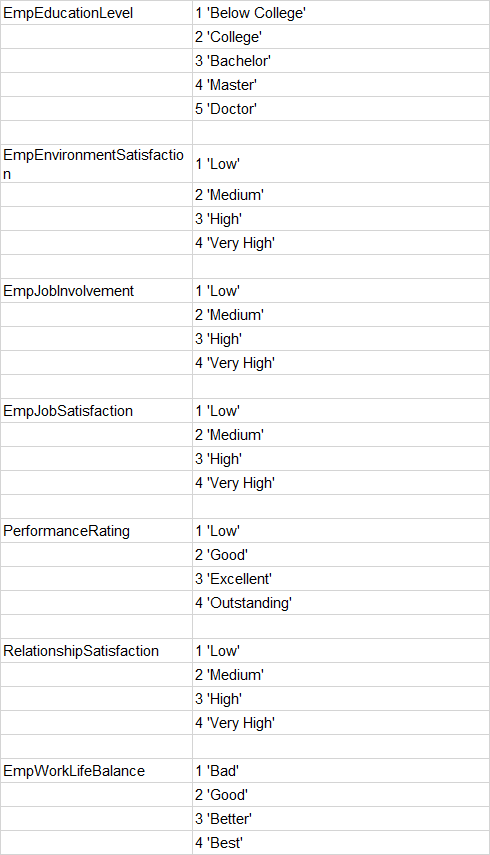

In [3]:
# Understand the data

df.info() # Shows there are 1,200 rows. 28 columns and their labels; of which 19 have numerical data while 9 have categorical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       



# **Source Code**

*Data processing*

In [4]:
# Check for missing values

df.isnull().sum()

,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


In [5]:
# Check for duplicates

df.duplicated().sum()

0

In [6]:
# Check for unique values

df.nunique()


,0
EmpNumber,1200
Age,43
Gender,2
EducationBackground,6
MaritalStatus,3
EmpDepartment,6
EmpJobRole,19
BusinessTravelFrequency,3
DistanceFromHome,29
EmpEducationLevel,5


*Exploratory Data Analysis*

In [7]:
# Statistical analysis

df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


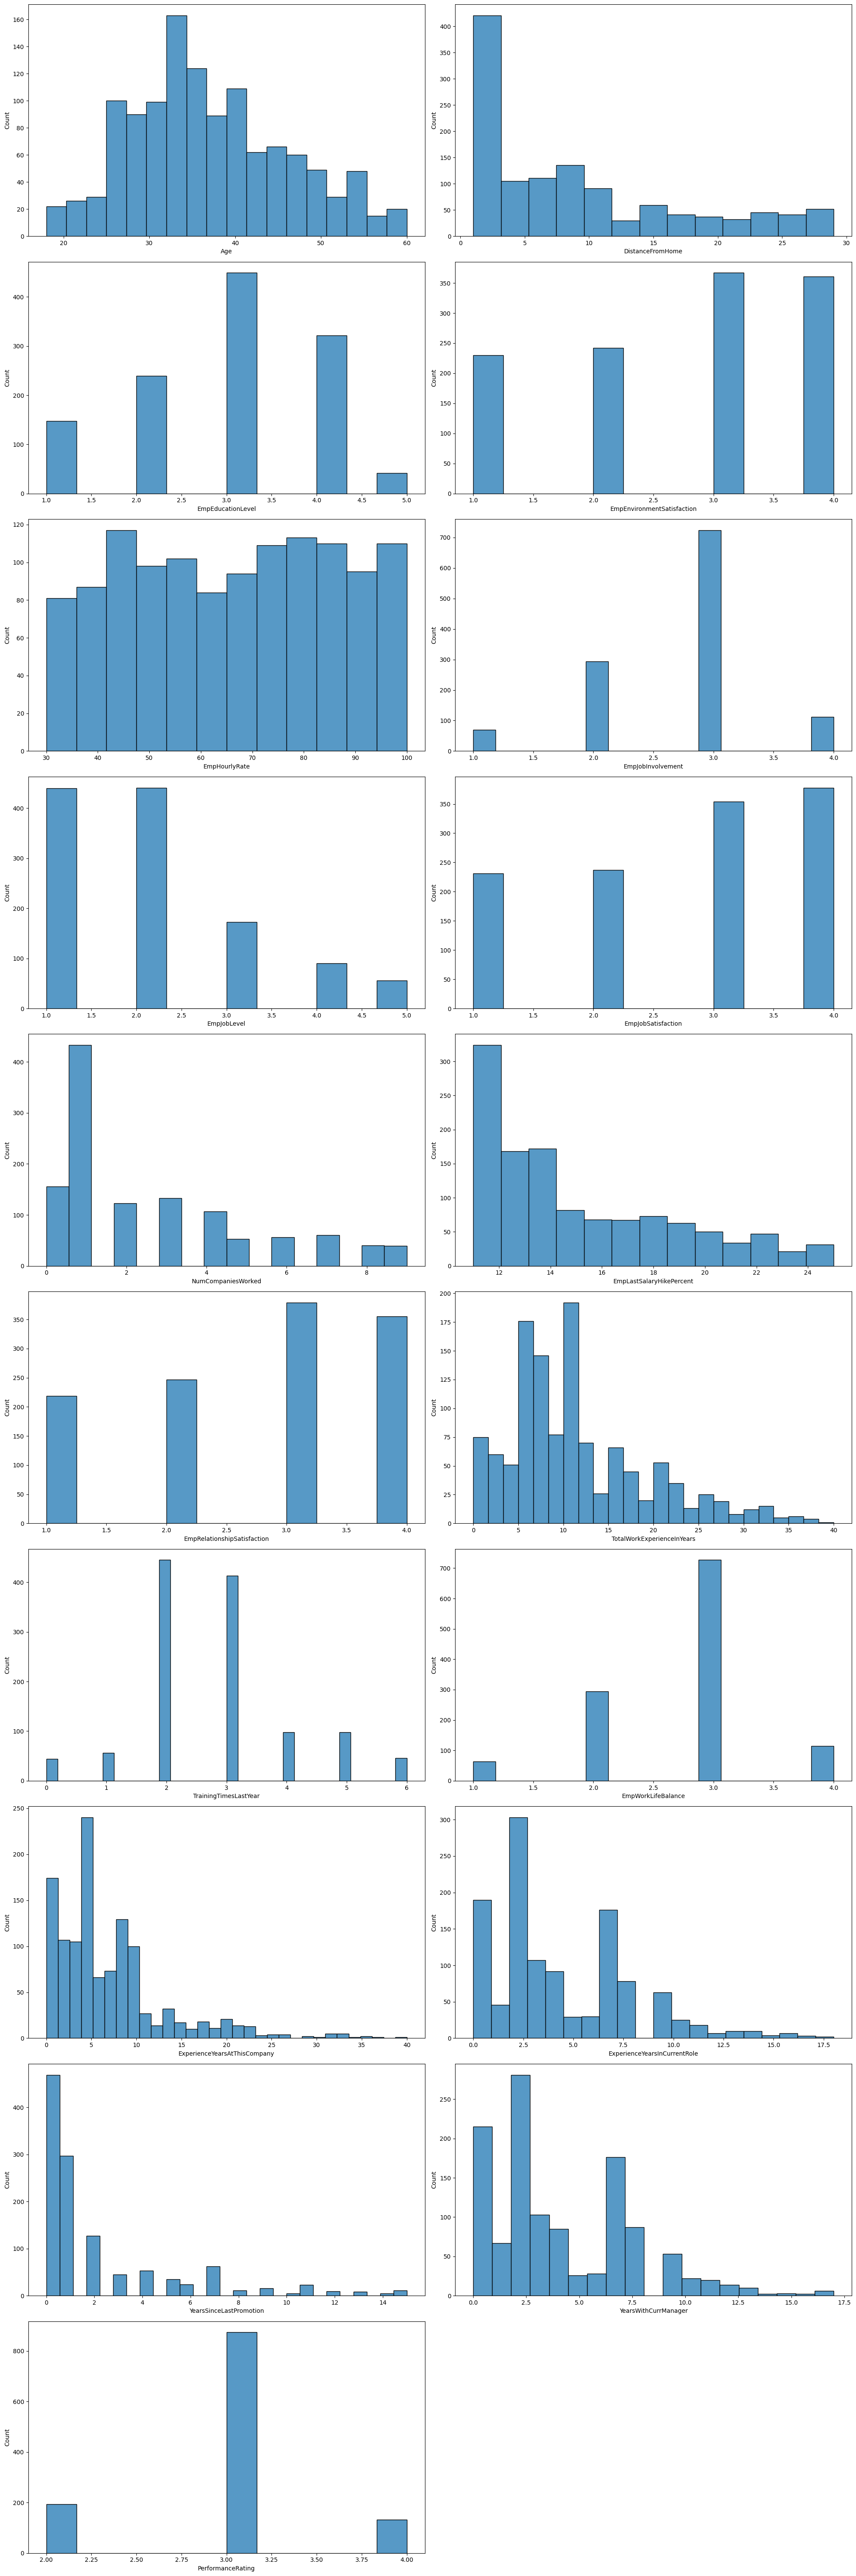

In [8]:
# visualize numerical data

plt.figure(figsize=(20,60))
numerical_feature = df.select_dtypes(include=['int64','float64']).columns
for i in range(0,len(numerical_feature)):
    plt.subplot(10,2,i+1)
    sns.histplot(df[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

Insights

Ages range between 18 to 60, 36 being the median.

Education level has a mean of 2.89, indicating averagely the employees have gotten to college level of education.

Environment and job satisfaction of employees ranges between 1 to 4. They average at about 2.7 which is medium.

The hourly rate is between 30 to 100. It averages at 65.98

Number of companies worked is between 1 to 9. A mean of 2.67 shows a good number of employees have not worked in more than 3 companies.

Last salary hike percent is between 11% to 25%. The average percentage being 15.22%.

Work experience is between 0 to 40 years. The average is at 11 years which shows the company has moderately experienced staff.

Work life balance is between 1 to 4; 1 being bad 4 being best. It averages at 2.74 which shows a moderate work life balance among the employees.

Years at the company is between 0 to 40. Averagely employees have been with the company for about 7 years years as the mean is at 6.23 years.

Years at current role ranges between 0 to 18 years. Employees averagely spend 4.29 years in one role.

Years since last promotion ranges between 0 to 15 years. 15 years is a quite big gap. Averagely promotions are given every 2.19 years.

Performance rating is between 1 to 4. The lowest rating given out is a 2 (good) and averagely the performance is at 2.95.

In [9]:
# Categorical data

df.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


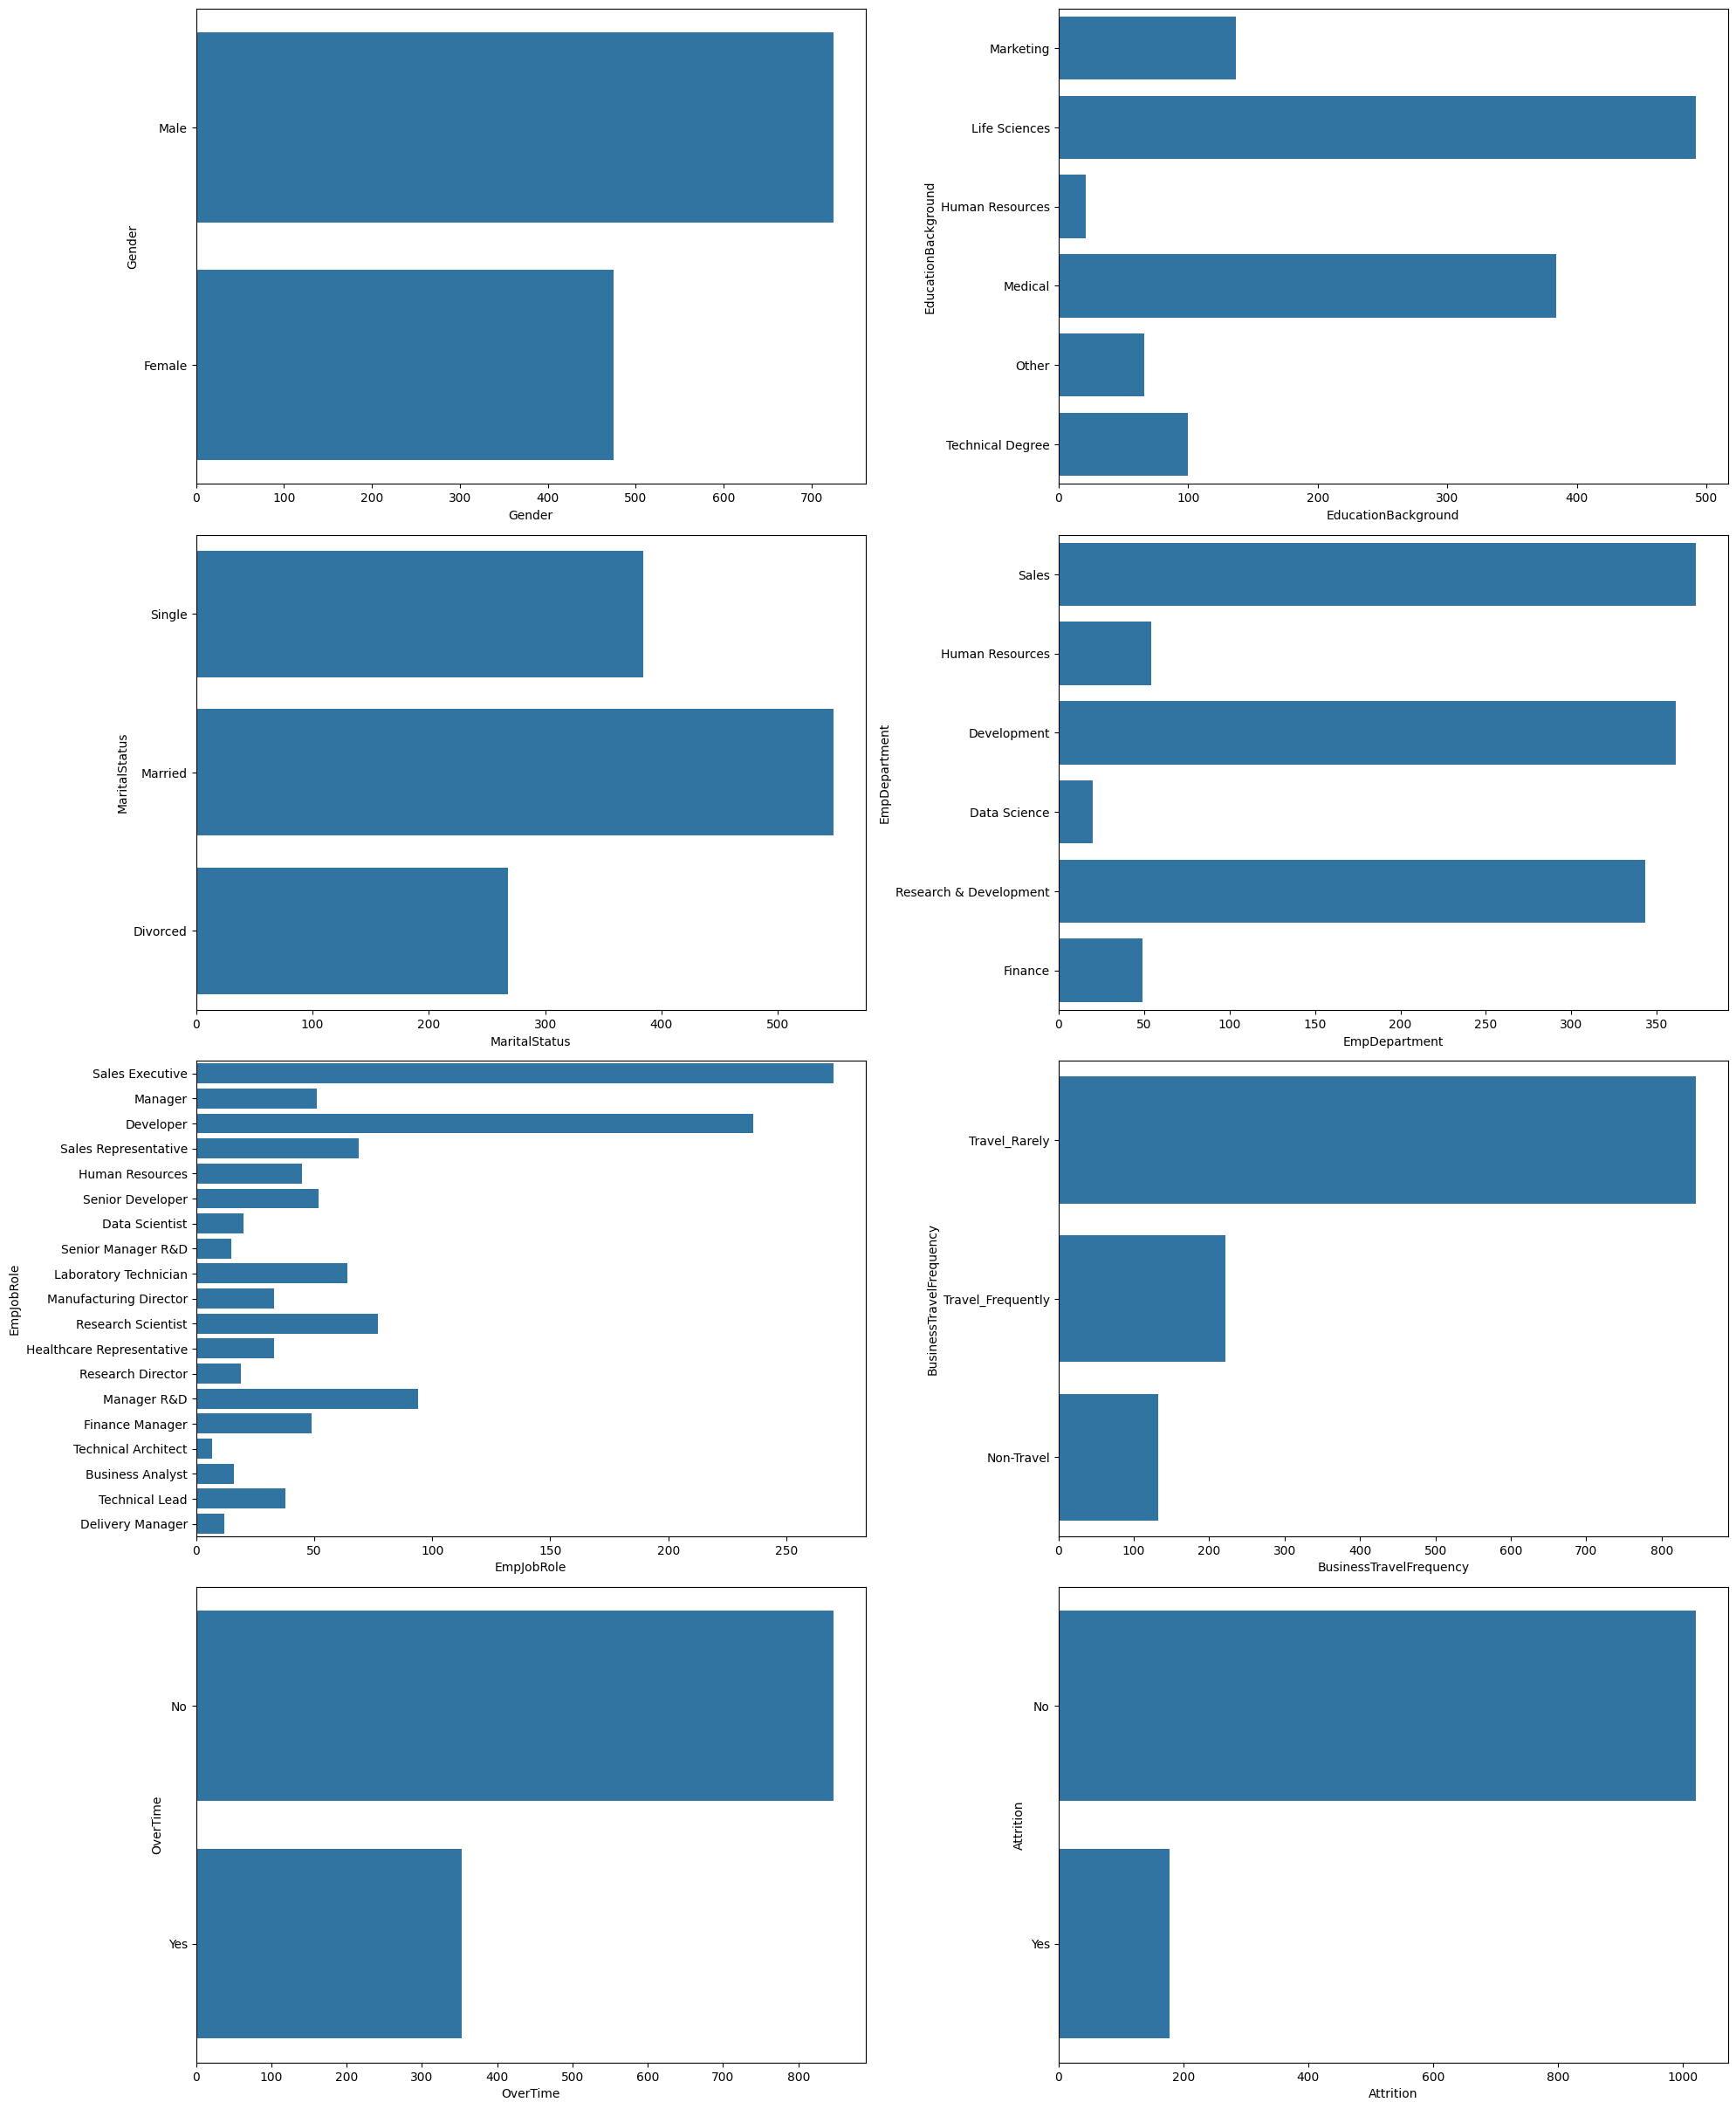

In [10]:
# Visualize categorical data
# we will drop the employee number column as we will not need it for this part of visualization

df.drop(['EmpNumber'], axis=1, inplace=True)
plt.figure(figsize=(20,60))
categorical_feature = df.select_dtypes(include=['object']).columns
for i in range(0,len(categorical_feature)):
  plt.subplot(10,2,i+1)
  sns.countplot(df[categorical_feature[i]])
  plt.xlabel(categorical_feature[i])
  plt.tight_layout()


Insights:

There are more males than females in the organnization.

Most employees have a life sciences education background, followed by medicine.

Married employees are more than singles and divorced.

Sales has the highest number of employees while data science has the least.

Most of the employees rarely travel, a moderate number frequently travel while the rest do not travel.

There are more employees who do not work overtime compared to those who do.

The number of employees who would leave the company(attrition) are far less than thos who would stay.


**Department performance**
*(inclusive of visualizations done with Tableau)*

In [11]:
dept_performance = df.groupby('EmpDepartment')['PerformanceRating'].value_counts()
dept_performance

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

Insights:

Data science has the lowest count (1 person) of the lowest performance (a rating of 2); also the lowest count (2 people) of the highest performance (rating of 4).

Development has the highest count (44 people) of the highest performance rating which is a 4.

Sales has the highest count (87 people) of the lowest performance rating (a 2).

In [12]:
# mean performance per department

df.groupby('EmpDepartment')['PerformanceRating'].mean()

,PerformanceRating
EmpDepartment,
Data Science,3.050000
Development,3.085873
Finance,2.775510
Human Resources,2.925926
Research & Development,2.921283
Sales,2.860590


Visual representations for department performance per employee done with tableau

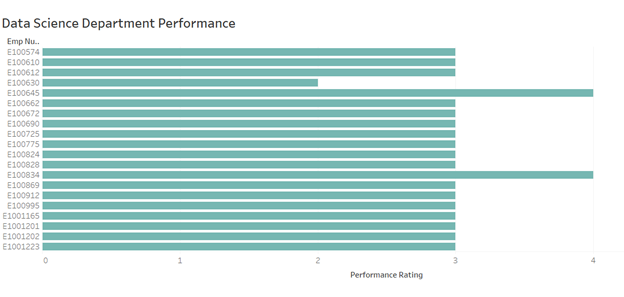

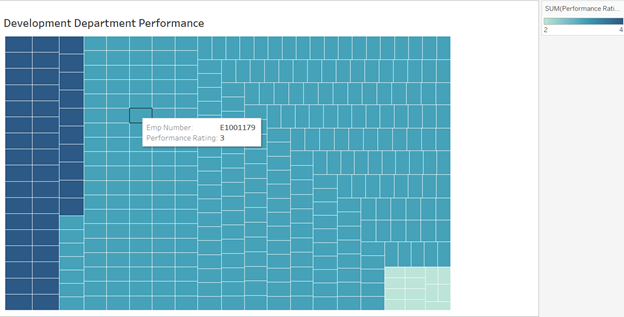

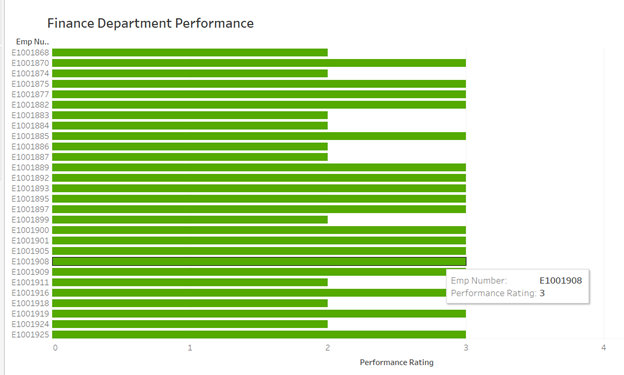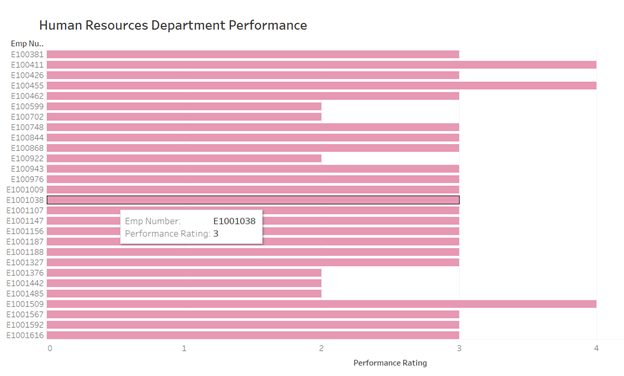
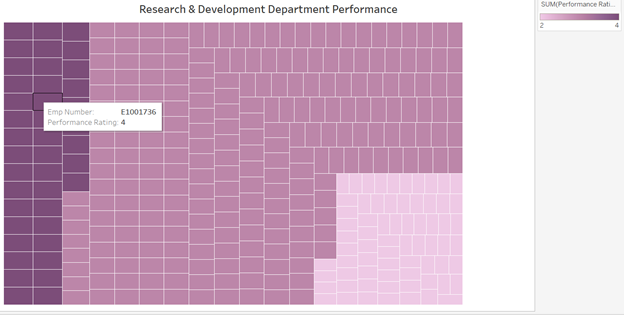
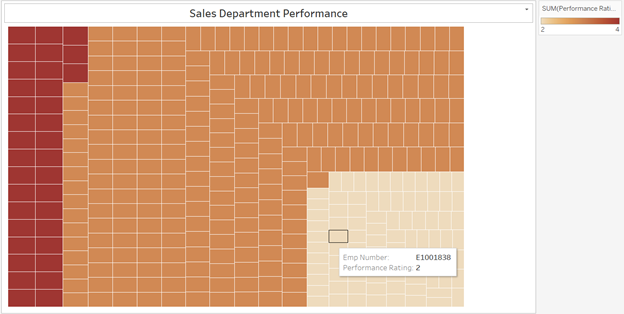


Visualization of Environment satisfaction in departments (Tableau)

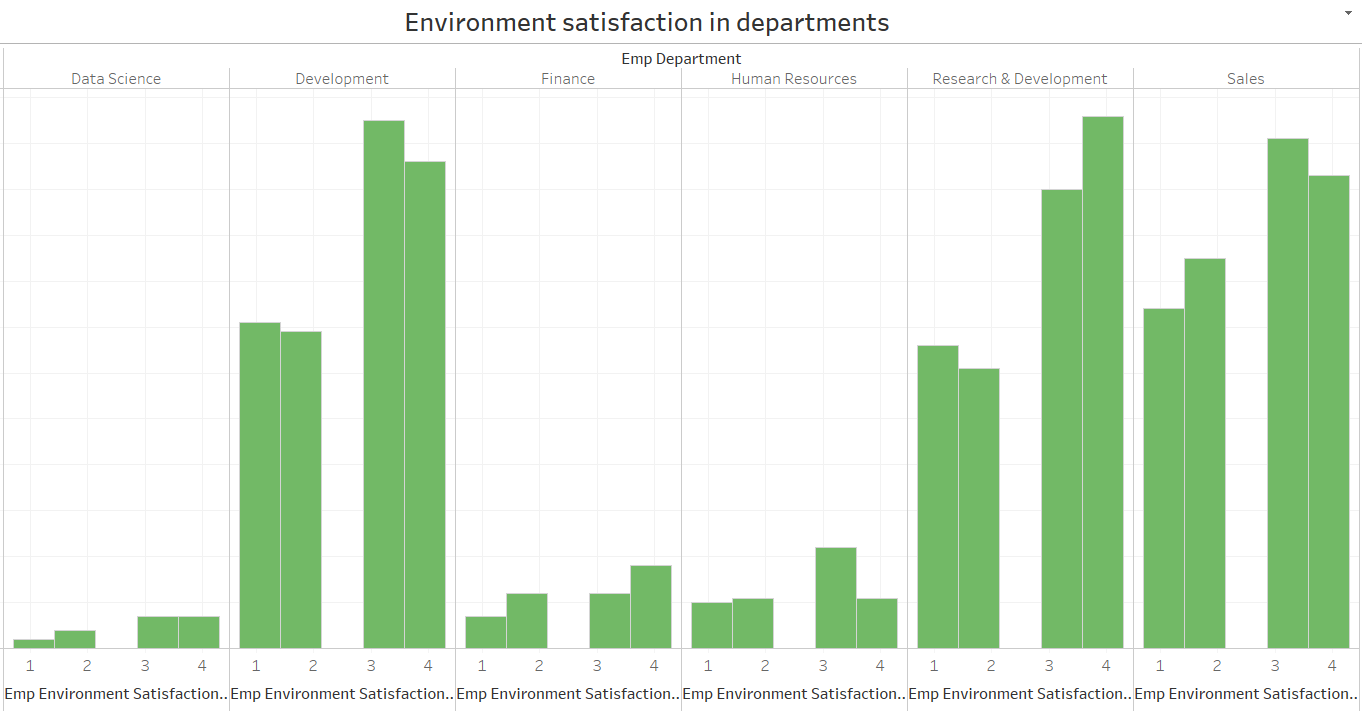

Development and Research and development have the highest number of people with high environment satisfaction ratings.Data science has the least.

Years since last promotion in departments
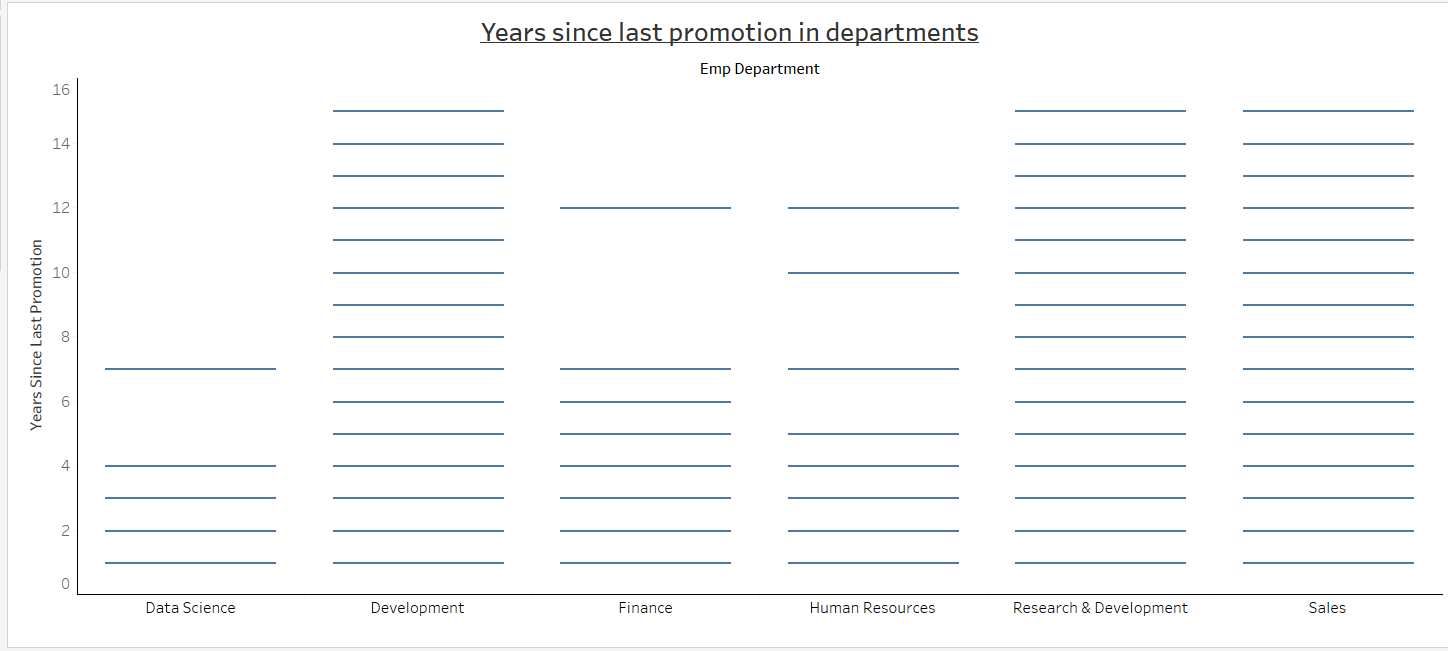

Development, Research and development and sales have the highest number (15) of years since last promotion while Data science has the least(7 years). Development, Research and development and Sales have promotions yearly.

Visualization of Last salary hike percent per department

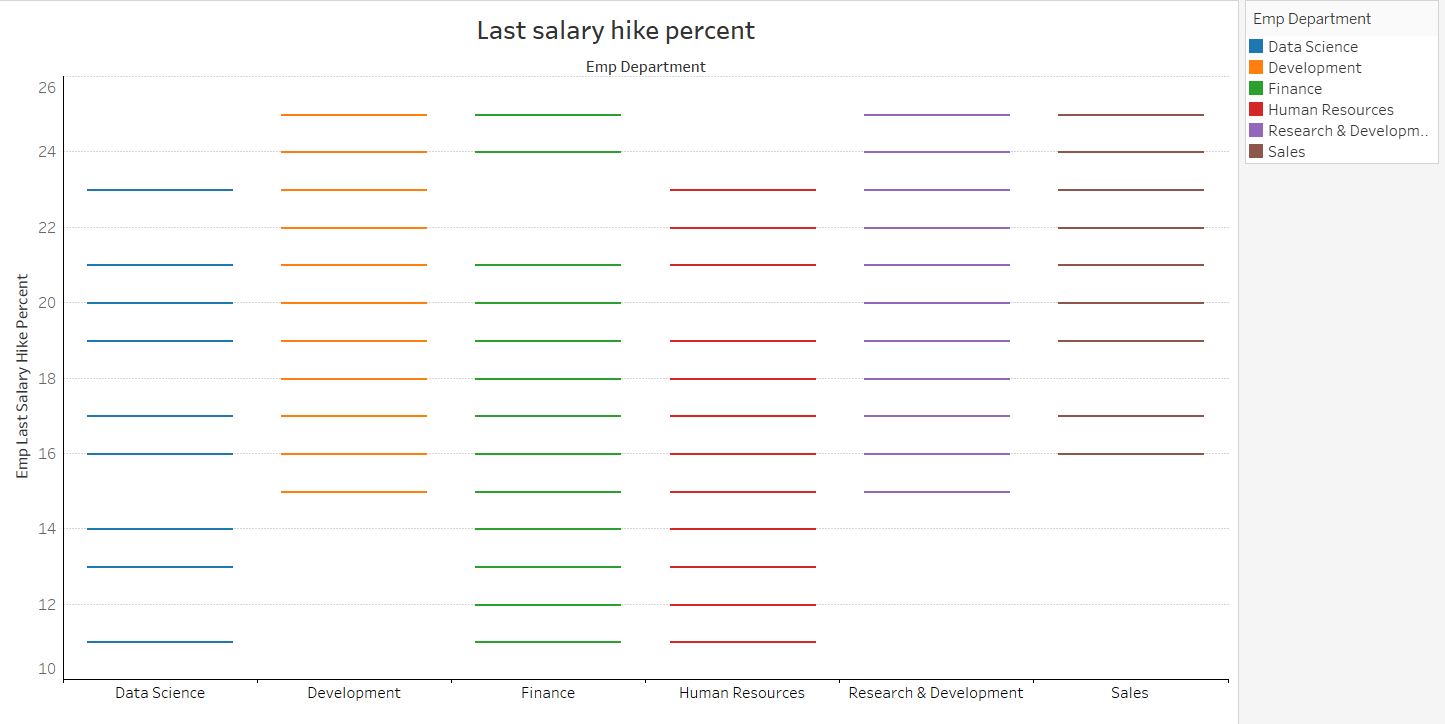

Sales has the highest least percentage of salary hike at 16%.
Development, finance, research and development and sales have the highest salary hike percentage of 25%.

In [13]:
# Data encoding - transforming categorical data into numerical data

label = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = label.fit_transform(df[i])

df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


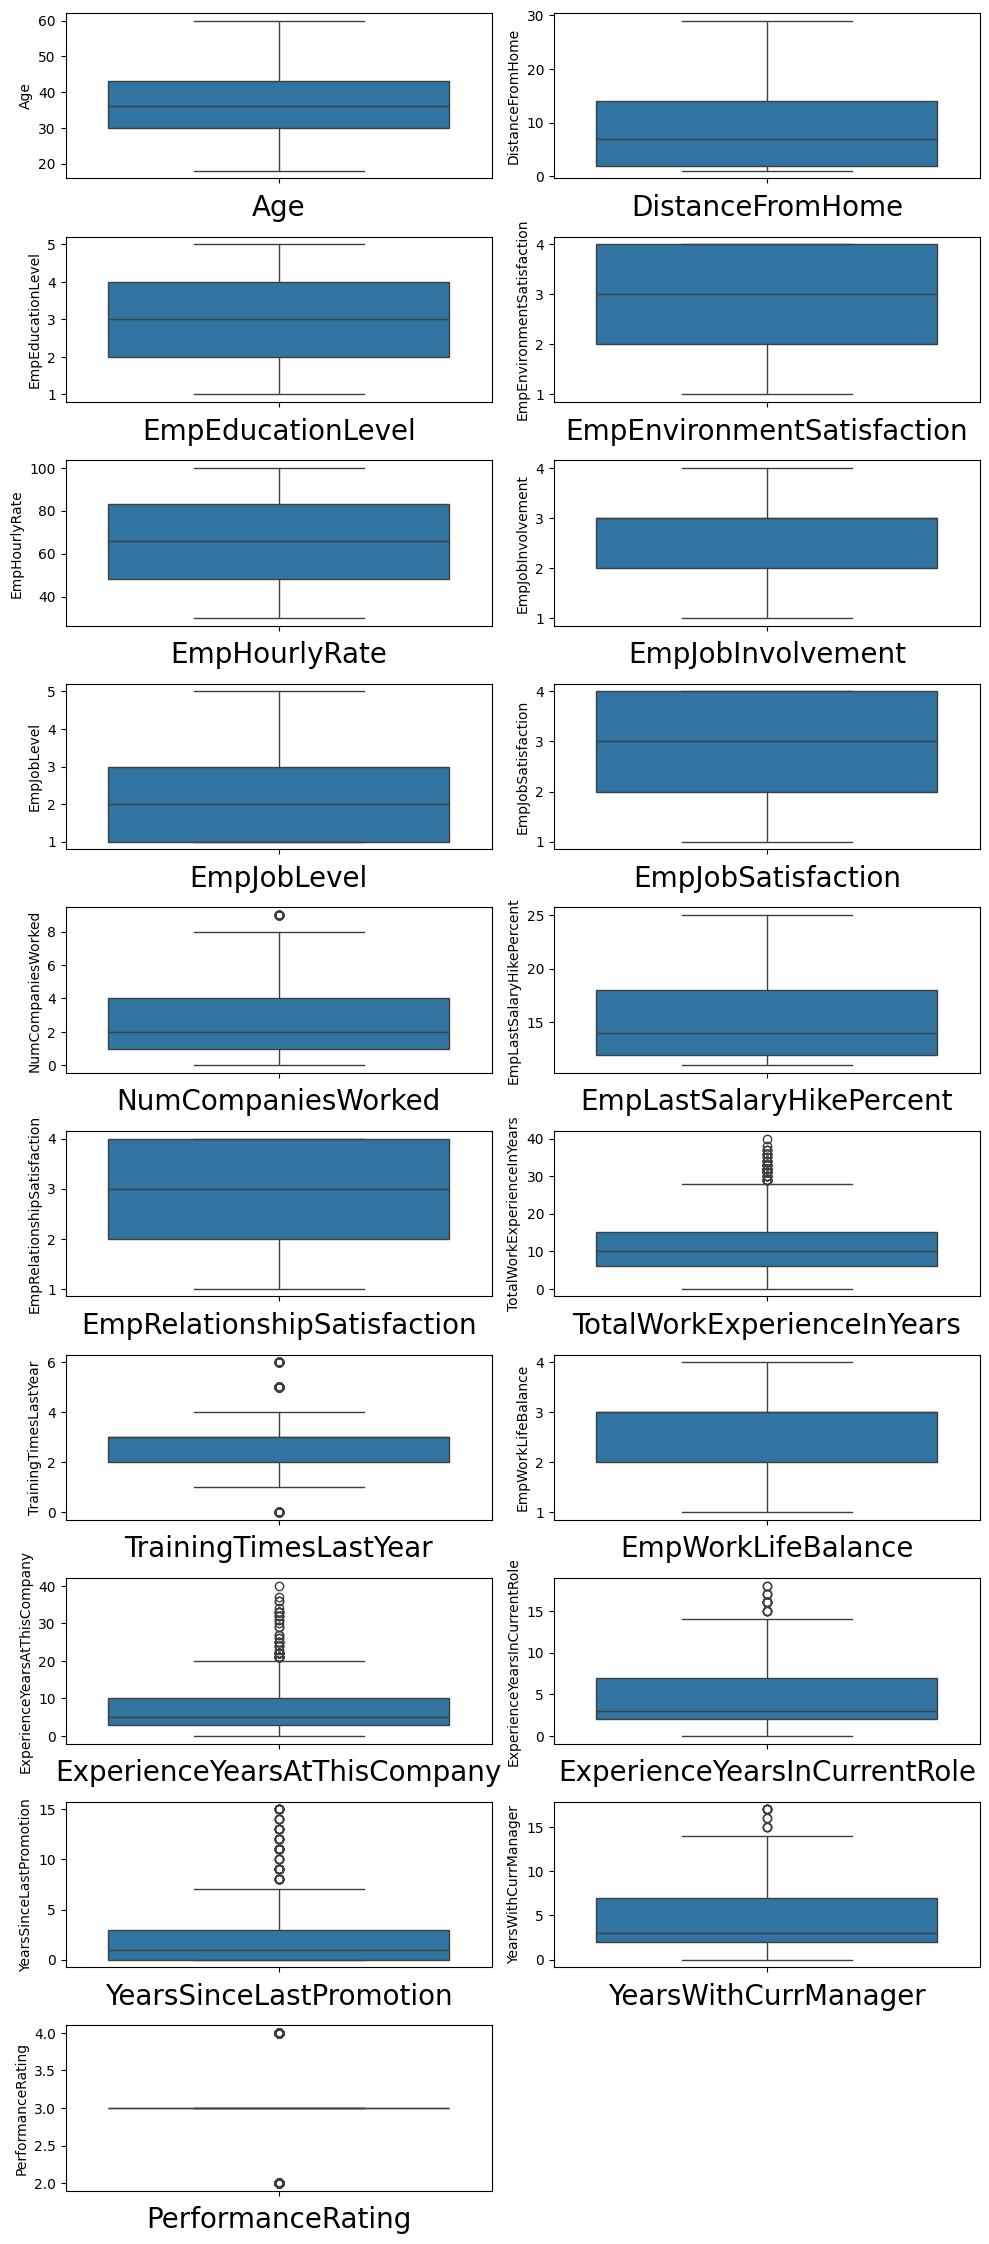

In [14]:
#checking outliers
plt.figure(figsize=(10,40))
plotnumber=1
for column in numerical_feature:
    if plotnumber<=28:
        ax=plt.subplot(18,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers are present in

*   numbers of companies worked
*   total work experience in years
*   training times in last year
*   experience in years at this company
*   experience in years in current role
*   years since last promotion
*   years with current manager







In [15]:
# Download the new file

from google.colab import files
df.to_csv('INX_Future_Inc_Employee_Performance.csv', index=False)
files.download('INX_Future_Inc_Employee_Performance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# Replace outliers with median

for column in numerical_feature:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

median = df['NumCompaniesWorked'].median()
df['NumCompaniesWorked'] = np.where((df['NumCompaniesWorked'] <(Q1 - 1.5* IQR)) | df['NumCompaniesWorked']> (Q3 + 1.5 * IQR), median, df['NumCompaniesWorked'])
df['NumCompaniesWorked'] = np.log(df['NumCompaniesWorked'])

median = df['TotalWorkExperienceInYears'].median()
df['TotalWorkExperienceInYears'] = np.where((df['TotalWorkExperienceInYears'] <(Q1 - 1.5* IQR)) | df['TotalWorkExperienceInYears']> (Q3 + 1.5 * IQR), median, df['TotalWorkExperienceInYears'])
df['TotalWorkExperienceInYears'] = np.log(df['TotalWorkExperienceInYears'])

median = df['TrainingTimesLastYear'].median()
df['TrainingTimesLastYear'] = np.where((df['TrainingTimesLastYear'] <(Q1 - 1.5* IQR)) | df['TrainingTimesLastYear']> (Q3 + 1.5 * IQR), median, df['TrainingTimesLastYear'])
df['TrainingTimesLastYear'] = np.log(df['TrainingTimesLastYear'])

median = df['ExperienceYearsAtThisCompany'].median()
df['ExperienceYearsAtThisCompany'] = np.where((df['ExperienceYearsAtThisCompany'] <(Q1 - 1.5* IQR)) | df['ExperienceYearsAtThisCompany']> (Q3 + 1.5 * IQR), median, df['ExperienceYearsAtThisCompany'])
df['ExperienceYearsAtThisCompany'] = np.log(df['ExperienceYearsAtThisCompany'])

median = df['ExperienceYearsInCurrentRole'].median()
df['ExperienceYearsInCurrentRole'] = np.where((df['ExperienceYearsInCurrentRole'] <(Q1 - 1.5* IQR)) | df['ExperienceYearsInCurrentRole']> (Q3 + 1.5 * IQR), median, df['ExperienceYearsInCurrentRole'])
df['ExperienceYearsInCurrentRole'] = np.log(df['ExperienceYearsInCurrentRole'])

median = df['YearsSinceLastPromotion'].median()
df['YearsSinceLastPromotion'] = np.where((df['YearsSinceLastPromotion'] <(Q1 - 1.5* IQR)) | df['YearsSinceLastPromotion']> (Q3 + 1.5 * IQR), median, df['YearsSinceLastPromotion'])
df['YearsSinceLastPromotion'] = np.log(df['YearsSinceLastPromotion'])

median = df['YearsWithCurrManager'].median()
df['YearsWithCurrManager'] = np.where((df['YearsWithCurrManager'] <(Q1 - 1.5* IQR)) | df['YearsWithCurrManager']> (Q3 + 1.5 * IQR), median, df['YearsWithCurrManager'])
df['YearsWithCurrManager'] = np.log(df['YearsWithCurrManager'])

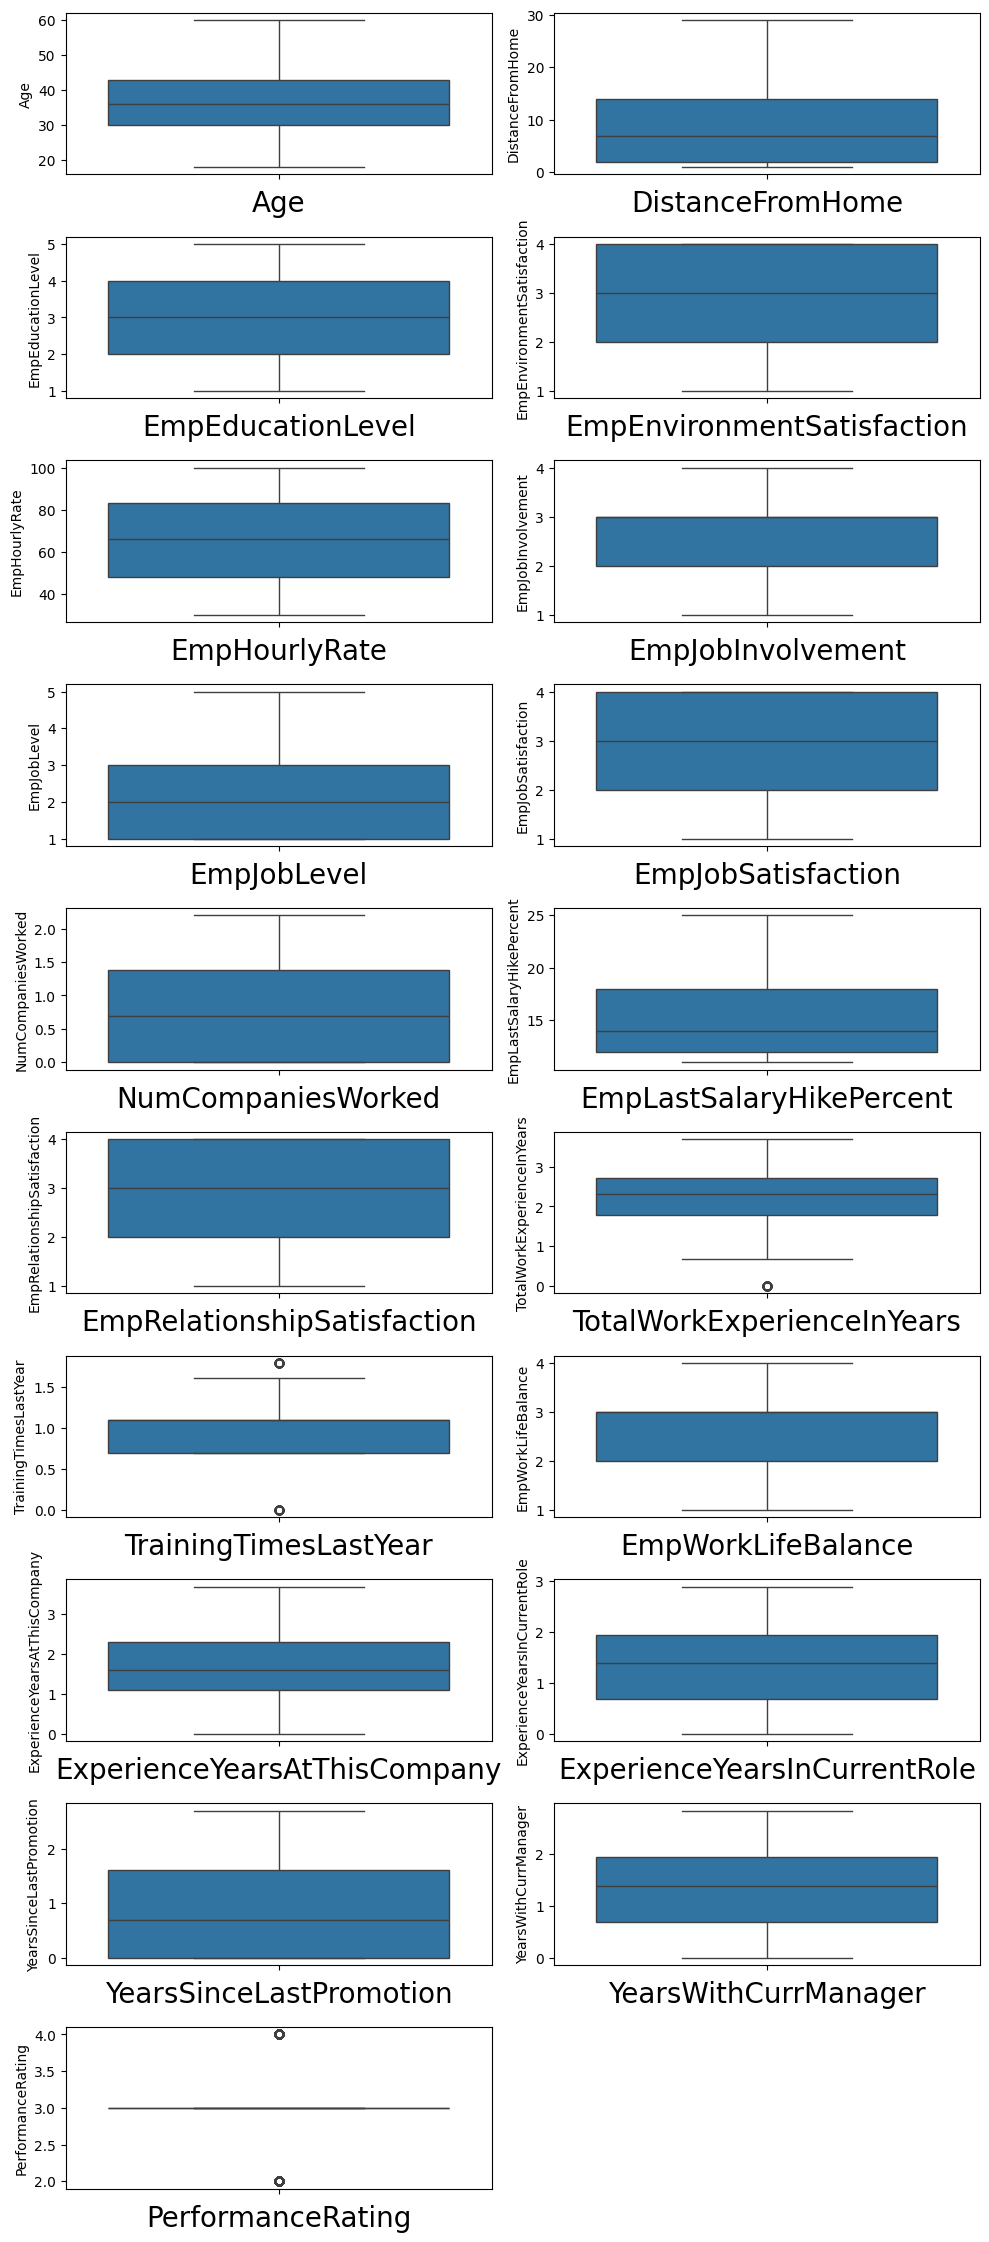

In [17]:
# Recheck outliers

plt.figure(figsize=(10,40))
plotnumber=1
for column in numerical_feature:
    if plotnumber<=28:
        ax=plt.subplot(18,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

*Feature engineering and selection*

In [18]:
# Correlation analysis

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.357059,0.051910,-0.006105,0.049749,0.618854,-0.011046,-0.019563,0.239941,0.201588,0.219152,0.197803,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,0.002218,0.010949,-0.050685,0.024680,-0.038004,-0.038410,-0.005319,0.030707,-0.052822,-0.050504,0.015793,-0.043626,-0.021691,-0.040364,-0.042615,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,-0.030234,-0.025505,-0.056338,-0.030977,-0.015665,0.007046,-0.009788,0.005652,-0.022911,0.038034,0.022890,0.017020,-0.045919,0.006064,-0.020760,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,-0.013540,-0.043355,-0.087359,0.044593,-0.038622,-0.022833,0.010128,0.026410,-0.084876,0.013092,0.014154,-0.051422,-0.054465,-0.045110,-0.051008,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,0.003957,-0.076988,0.100526,0.007150,-0.025141,-0.026841,-0.012661,-0.050286,0.031786,0.034178,0.068875,0.083639,0.084063,0.062709,0.048933,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,-0.016179,-0.008034,0.004406,0.032916,-0.030754,0.015075,0.005735,-0.043067,-0.049260,0.010143,-0.007519,0.012858,0.025859,0.029005,-0.015089,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,0.025400,0.016652,0.036360,-0.031236,0.036814,0.032229,-0.041946,-0.032705,0.009396,-0.001963,-0.040969,-0.041848,-0.012077,-0.028918,-0.049170,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.044477,0.024940,0.044974,-0.009509,0.037751,-0.035546,-0.044788,0.020008,0.017227,-0.011052,0.011604,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.154213,-0.021119,0.002358,-0.016690,0.176356,-0.015655,0.010276,0.074641,0.059092,0.077873,0.072421,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.015431,0.064270,-0.047271,-0.010504,-0.021530,0.024423,-0.000262,0.019807,0.038884,-0.018462,0.011892,-0.123490,0.395561


In [19]:
# Top correlations

corr_pairs = corr.unstack()
corr_pairs = corr_pairs[corr_pairs!=1].dropna()
corr_pairs = corr_pairs.sort_values(ascending=False)
top_correlated_pairs = corr_pairs.head(10)
top_correlated_pairs

,,0
ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,0.815023
ExperienceYearsInCurrentRole,ExperienceYearsAtThisCompany,0.815023
ExperienceYearsAtThisCompany,YearsWithCurrManager,0.774523
YearsWithCurrManager,ExperienceYearsAtThisCompany,0.774523
EmpJobLevel,TotalWorkExperienceInYears,0.684929
TotalWorkExperienceInYears,EmpJobLevel,0.684929
YearsWithCurrManager,ExperienceYearsInCurrentRole,0.672126
ExperienceYearsInCurrentRole,YearsWithCurrManager,0.672126
TotalWorkExperienceInYears,Age,0.618854
Age,TotalWorkExperienceInYears,0.618854


Insights:

The important features selected have a correlation of 0.1 and above to performance. They include


*   Department
*   Job role
*    Environment satisfaction
*      Last salary hike percent
*      Work-life balance
*    Years at this company
*Years in current role
*     Years since last promotion
*      Years with current manager

The top 3 features in correlation to performance are


1.   Environment satisfaction (0.4)
1.   Last salary hike percent (0.33)
2.   Work-life balance (0.12)




More insights we get are:

Job level and years in the company have a correlation of 0.54 indicating that the company promotes and advances the employees carrers.

Performance and environment satisfaction have a correlation of about 0.4. This shows that the higher performing employees have a greater environment satisfaction score.

Last salary hike percentage and performance rating have a correlation of 0.33 indicating that higher performing employees get higher salary increaments.

The older employees have more years in the company (0.32 correlation).

Overtime and attrition (0.22 correlation), shows that those working more hours are more likely to leave the company.

Age and attrition have a negative correlation of -0.19. This may show that the younger employees are more likely to leave the company.


The ones who have more years of work experience are less likely to leave the company (-0.185).

Gender, education background, distance from home,employee relationship satisfaction, job satisfaction, hourly rate and training times show little to no correlation to other factors.






In [20]:
# Using important features and splitting of columns

X = df[['EmpDepartment','EmpJobRole','EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
y = df['PerformanceRating']

In [21]:
# Check balance of target variable

df['PerformanceRating'].value_counts()

,count
PerformanceRating,
3,874
2,194
4,132


In [22]:
# Handling imbalanced target variable
# Recommended tool for balancing is SMOTE (synthetic minority oversampling technique) to generate new samples,so we import it
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_replaced = X.replace([np.inf, -np.inf], np.nan) # Replace infinite values with NaN
X_resampled, y_resampled = smote.fit_resample(X_replaced.fillna(X_replaced.mean()), y)


In [23]:
# Check the new y counts

y_resampled = pd.DataFrame(y_resampled)
y_resampled.value_counts()

,count
PerformanceRating,
2,874
3,874
4,874


In [24]:
# Spliting into train and test

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# We found infinite vales in X so we handle them in training and testing data
X_train_replaced = X_train.replace([np.inf, -np.inf], np.nan)
X_train_filled = X_train_replaced.fillna(X_train_replaced.mean())

X_test_replaced = X_test.replace([np.inf, -np.inf], np.nan)
X_test_filled = X_test_replaced.fillna(X_test_replaced.mean())

# Scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_filled)
X_test = scaler.transform(X_test_filled)

# Check the shapes

print(X_train.shape)
print(X_test.shape)

(2097, 9)
(525, 9)


***Models***

Model selection

We are handling a classification problem so we will make use of Decision tree classifier, Random forest classifier and KNearest Neighbour (KNN)

*Decision Tree*

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train the model

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)
model.fit(X_train_filled, y_train)

# Make predictions

y_pred = model.predict(X_test_filled)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Classification report:\n", classification_report)
print("Confusion matrix:\n", confusion_matrix)

Accuracy: 88.57%
Classification report:
               precision    recall  f1-score   support

           2       0.87      0.92      0.89       184
           3       0.88      0.84      0.86       173
           4       0.92      0.90      0.91       168

    accuracy                           0.89       525
   macro avg       0.89      0.89      0.89       525
weighted avg       0.89      0.89      0.89       525

Confusion matrix:
 [[169  11   4]
 [ 18 145  10]
 [  8   9 151]]


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train the model

model = DecisionTreeClassifier()
model.fit(X_train_filled, y_train)

# Make predictions

y_pred = model.predict(X_test_filled)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Classification report:\n", classification_report)
print("Confusion matrix:\n", confusion_matrix)

Accuracy: 93.14%
Classification report:
               precision    recall  f1-score   support

           2       0.94      0.94      0.94       184
           3       0.91      0.91      0.91       173
           4       0.95      0.95      0.95       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525

Confusion matrix:
 [[173   8   3]
 [ 10 157   6]
 [  2   7 159]]


*Random forest*

In [27]:
# Random forest with n estimators
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train the model

model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train_filled, y_train)

# Make predictions

y_pred = model.predict(X_test_filled)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Classification report:\n", classification_report)
print("Confusion matrix:\n", confusion_matrix)

Accuracy: 96.19%
Classification report:
               precision    recall  f1-score   support

           2       0.97      0.97      0.97       184
           3       0.95      0.94      0.94       173
           4       0.96      0.98      0.97       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525

Confusion matrix:
 [[179   5   0]
 [  5 162   6]
 [  1   3 164]]


In [28]:
# Hyper parameter tuning

# Define the parameter grid
param_grid={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs= 1, verbose= 2)
grid_search.fit(X_train_filled, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estim

In [29]:
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train the model

model = RandomForestClassifier(bootstrap= False, max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators=  200)
model.fit(X_train_filled, y_train)

# Make predictions

y_pred = model.predict(X_test_filled)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Classification report:\n", classification_report)
print("Confusion matrix:\n", confusion_matrix)


Accuracy: 96.00%
Classification report:
               precision    recall  f1-score   support

           2       0.96      0.97      0.96       184
           3       0.95      0.94      0.94       173
           4       0.98      0.97      0.97       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525

Confusion matrix:
 [[178   6   0]
 [  6 163   4]
 [  2   3 163]]


In [43]:
# Second run
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train the model


model = RandomForestClassifier(bootstrap= False, max_depth= None, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators=  200)
model.fit(X_train_filled, y_train)

# Make predictions

y_pred = model.predict(X_test_filled)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Classification report:\n", classification_report)
print("Confusion matrix:\n", confusion_matrix)

Accuracy: 96.38%
Classification report:
               precision    recall  f1-score   support

           2       0.96      0.97      0.97       184
           3       0.95      0.94      0.95       173
           4       0.98      0.98      0.98       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525

Confusion matrix:
 [[179   5   0]
 [  6 163   4]
 [  1   3 164]]


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#  Train the model

model = RandomForestClassifier()
model.fit(X_train_filled, y_train)

# Make predictions

y_pred = model.predict(X_test_filled)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Classification report:\n", classification_report)
print("Confusion matrix:\n", confusion_matrix)

Accuracy: 96.19%
Classification report:
               precision    recall  f1-score   support

           2       0.96      0.97      0.96       184
           3       0.95      0.94      0.95       173
           4       0.98      0.97      0.97       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525

Confusion matrix:
 [[179   5   0]
 [  6 163   4]
 [  2   3 163]]


KNearest Neighbor

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# KNN with n neighbors
k_values = range(1, 21)
cv_scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_filled, y_train, cv=5)
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print("Best k value:", best_k)



Best k value: 1


In [32]:
# Train the model

model = KNeighborsClassifier(n_neighbors= 6)
model.fit(X_train_filled, y_train)

# Make predictions

y_pred = model.predict(X_test_filled)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Classification report:\n", classification_report)
print("Confusion matrix:\n", confusion_matrix)

Accuracy: 86.67%
Classification report:
               precision    recall  f1-score   support

           2       0.82      0.96      0.88       184
           3       0.94      0.68      0.79       173
           4       0.87      0.96      0.91       168

    accuracy                           0.87       525
   macro avg       0.88      0.87      0.86       525
weighted avg       0.88      0.87      0.86       525

Confusion matrix:
 [[176   2   6]
 [ 36 118  19]
 [  2   5 161]]


In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#  Train the model

model = KNeighborsClassifier()
model.fit(X_train_filled, y_train)

# Make predictions

y_pred = model.predict(X_test_filled)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Classification report:\n", classification_report)
print("Confusion matrix:\n", confusion_matrix)

Accuracy: 88.57%
Classification report:
               precision    recall  f1-score   support

           2       0.85      0.97      0.91       184
           3       0.97      0.71      0.82       173
           4       0.87      0.98      0.92       168

    accuracy                           0.89       525
   macro avg       0.90      0.88      0.88       525
weighted avg       0.90      0.89      0.88       525

Confusion matrix:
 [[179   1   4]
 [ 31 122  20]
 [  1   3 164]]


In [34]:
# Check predicted performance rating value counts

y_pred_int = np.round(y_pred).astype(int)
y_pred_int = np.clip(y_pred_int, 1, 4)
y_pred_int = pd.DataFrame(y_pred_int)
y_pred_int.value_counts()

,count
0,
2,211
4,188
3,126


In [35]:
# Check shape of predicted values

y_pred_int.shape

(525, 1)

In [36]:
# Show a sample of predicted values

y_pred_int.head(10)


,0
0,2
1,3
2,2
3,3
4,4
5,4
6,2
7,2
8,4
9,2


In [37]:
# Check feature importance
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train_filled, y_train)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
3,EmpLastSalaryHikePercent,0.326606
2,EmpEnvironmentSatisfaction,0.252746
7,YearsSinceLastPromotion,0.097782
5,ExperienceYearsAtThisCompany,0.066208
6,ExperienceYearsInCurrentRole,0.064954
8,YearsWithCurrManager,0.057585
4,EmpWorkLifeBalance,0.055043
1,EmpJobRole,0.043168
0,EmpDepartment,0.035908


In [38]:
# Getting top 3 features with best model

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_3_features = feature_importances.nlargest(3)
top_3_features

,0
EmpLastSalaryHikePercent,0.326606
EmpEnvironmentSatisfaction,0.252746
YearsSinceLastPromotion,0.097782


Visualize top 3 features affecting performance rating

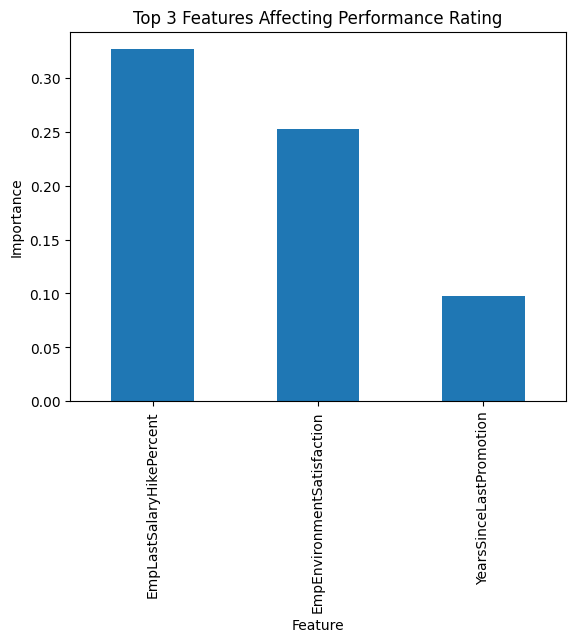

In [39]:
# Plot top 3 features affecting performance rating

top_3_features.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 3 Features Affecting Performance Rating')
plt.show()


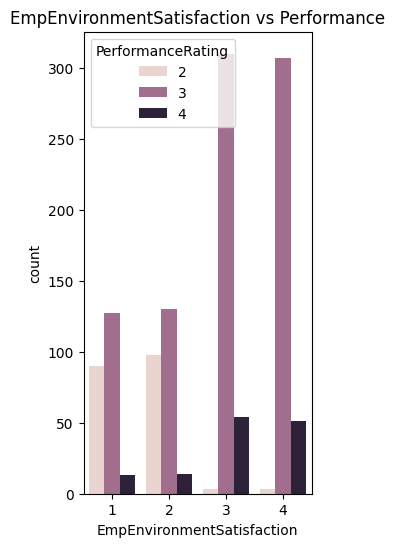

In [40]:
# Visualize top 3 features vs Performance
top_features_df = df[['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'YearsSinceLastPromotion', 'PerformanceRating']]
plt.figure(figsize= (10, 6) )

# Environment satisfaction

plt.subplot(1,3,1)
sns.countplot(x='EmpEnvironmentSatisfaction',hue= 'PerformanceRating', data=top_features_df)
plt.title('EmpEnvironmentSatisfaction vs Performance')
plt.show()


Employees who rate environment satisfaction 3 and 4 are the most and have a performance score of 3.

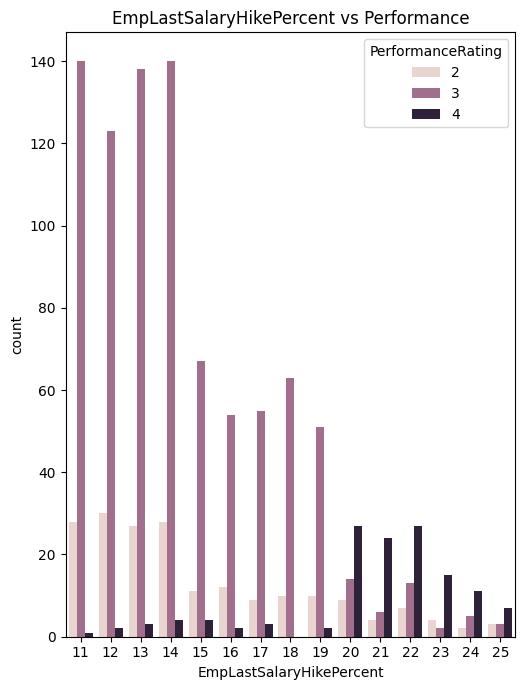

In [41]:
# Last salary hike percent

plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
sns.countplot(x='EmpLastSalaryHikePercent', hue='PerformanceRating', data=top_features_df)
plt.title('EmpLastSalaryHikePercent vs Performance')
plt.tight_layout()
plt.show()

11% and 14% have the highest number of employees. They also have a performance rating of 3.

Percentages 20 - 25 have the least number of employees

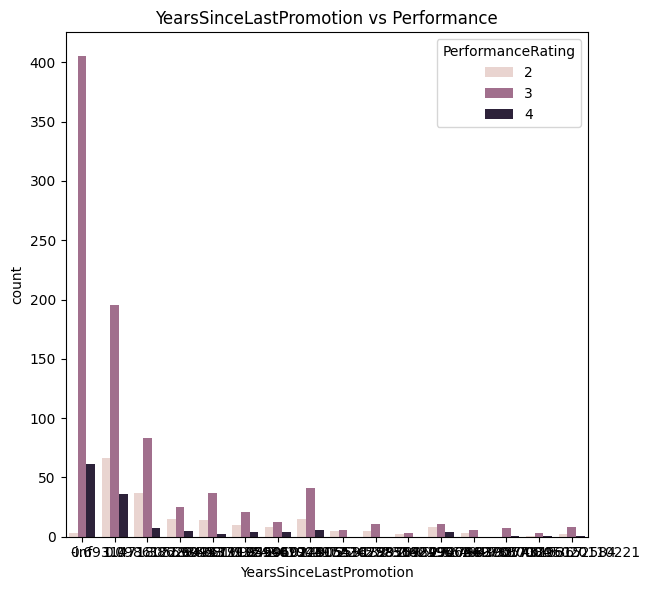

In [42]:
# Years since last promotion

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='YearsSinceLastPromotion', hue='PerformanceRating', data=top_features_df)
plt.title('YearsSinceLastPromotion vs Performance')
plt.tight_layout()
plt.show()

The highest number of employees have not been promoted.

A moderate number of employees have been promoted 1 or 2 years ago.